# Data

In [11]:
import pandas as pd
import sqlalchemy as sa

from dotenv import load_dotenv
import os

load_dotenv()

True

In [43]:
user = os.getenv('DB_USER')
passwd = os.getenv('DB_PASSWORD')
db_ip = os.getenv('DB_ADDRESS')
db_name = 'team_103'

engine = sa.create_engine(f'mysql://{user}:{passwd}@{db_ip}/{db_name}', echo=False)

In [44]:
jobs = pd.read_sql_table('JobPostings', engine)
jobs.head(10)

,JobId,CompanyId,Title,Description,FormattedWorkType,Location,Applies,OriginalListedTime,RemoteAllowed,Views,...,ApplicationType,Expiry,ClosedTime,FormattedExperienceLevel,SkillsDesc,ListedTime,PostingDomain,Sponsored,WorkType,Scraped
0,1004740969,882349,Civil Engineer,We are a growing and successful Structural Eng...,Full-time,"Forney, TX",28.0,1.692730e+12,NaN,82.0,...,ComplexOnsiteApply,1.708280e+12,NaN,None,None,1.692730e+12,None,1,FULL_TIME,1
1,102339515,52132271,Franchise Owner,DuctVentz is a dryer and A/C – heat vent clean...,Full-time,Greater Boston,NaN,1.699050e+12,NaN,NaN,...,SimpleOnsiteApply,1.701640e+12,NaN,None,None,1.699050e+12,None,0,FULL_TIME,1699063495
2,1029078768,61469,Registered Nurse (RN) Vaccinator,United Staffing Solutions is partnering with o...,Part-time,"Muskegon, MI",NaN,1.692740e+12,NaN,4.0,...,ComplexOnsiteApply,1.695330e+12,NaN,None,None,1.692740e+12,None,0,PART_TIME,1
3,133114754,77766802,Sales Manager,Are you a dynamic and creative marketing profe...,Full-time,"Santa Clarita, CA",NaN,1.692830e+12,NaN,NaN,...,ComplexOnsiteApply,1.695430e+12,NaN,None,None,1.692830e+12,None,0,FULL_TIME,1
4,133196985,1089558,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,Contract,"New York, NY",1.0,1.692730e+12,NaN,17.0,...,ComplexOnsiteApply,1.695320e+12,NaN,None,None,1.692730e+12,None,0,CONTRACT,1
5,1494619053,10696333,Accounting Assistant,The ideal candidate will be responsible for pe...,Full-time,"Manassas, VA",3.0,1.699040e+12,NaN,16.0,...,ComplexOnsiteApply,1.714600e+12,NaN,None,None,1.699040e+12,None,1,FULL_TIME,1699064685
6,1638550135,56186959,Office Manager,Client Success Manager (CSM)\nJob DescriptionA...,Part-time,"Sunrise, FL",NaN,1.698970e+12,NaN,2.0,...,ComplexOnsiteApply,1.714520e+12,NaN,None,None,1.698970e+12,None,0,PART_TIME,1698993921
7,1657978824,89350959,"REMOTE STEEL BUILDING SALES MAKE $1,000 TO $30...","REMOTE WORK FROM HOME $1,000 TO $10,000 COMMIS...",Contract,"Texas, United States",NaN,1.692830e+12,1.0,NaN,...,OffsiteApply,1.708390e+12,NaN,None,None,1.692830e+12,None,0,CONTRACT,1
8,1689807847,61870883,Cognitive Skills Clinician,"Great Opportunity to Gain Experience, Learn Ne...",Part-time,"Duluth, MN",NaN,1.699050e+12,NaN,NaN,...,SimpleOnsiteApply,1.714600e+12,NaN,None,None,1.699050e+12,None,0,PART_TIME,1699062459
9,1907764104,5226308,Bookkeeper,The ideal candidate will be well-organized and...,Full-time,"Bohemia, NY",NaN,1.699040e+12,NaN,10.0,...,ComplexOnsiteApply,1.714590e+12,NaN,None,None,1.699040e+12,None,1,FULL_TIME,1699045511


In [45]:
courses = pd.read_sql_table('Courses', engine)
courses.head()

,CRN,Year,Term,Subject,Number,Name,Description,CreditHours
0,10001,2024,Spring,MCB,582,Laboratory Rotation II,Laboratory research methods; familiarization o...,3 hours.
1,10002,2024,Spring,MCB,583,Laboratory Rotation III,Laboratory research methods; familiarization o...,3 hours.
2,10003,2024,Spring,EALC,590,Individual Study and Research,Supervised individual investigation or study o...,2 TO 12 hours.
3,10004,2024,Spring,AE,199,Undergraduate Open Seminar,Undergraduate Open Seminar. Approved for Lette...,0 TO 5 hours.
4,10005,2024,Spring,MICR,599,Thesis Research,Approved for S/U grading only. May be repeated.,0 TO 16 hours.


# NLP

In [46]:
from job_course_matching import get_matching_courses_for_jobs

In [48]:
%%timeit

job_id = '1004740969'

result = get_matching_courses_for_jobs(
    jobs[jobs["JobId"] == job_id],
    courses,
    threshold=0.3,
    N=5,
    min_description_size=60,
    join_all_courses_cols=True,
    merge_sections=True,
)

print(result)

2.62 s ± 12.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [40]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

# Download nltk files.
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/areetsheth/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/areetsheth/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/areetsheth/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [41]:
MIN_DESCRIPTION_SIZE = 60

def tokenize_lemmatize_text(text):    
    # First, we tokenize the text.
    word_tokens = word_tokenize(text.lower())
    # Then, we lemmatize the tokens and remove the stopwords
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    normalized_text = [lemmatizer.lemmatize(word) for word in word_tokens if word not in stop_words]

    return ' '.join(normalized_text)

def tf_idf(tokens, vocabulary=None):
    vectorizer = TfidfVectorizer(vocabulary=vocabulary)
    M = vectorizer.fit_transform(tokens)
    return M, vectorizer.vocabulary_

# We'll consider only the job descriptions and course descriptions for now.
#
# We'll start by dropping the rows with NULL values.
print(f'Jobs shape before dropping NULL values: {jobs.shape}, Courses shape before dropping NULL values: {courses.shape}')
# jobs = jobs.dropna(subset=['Description'])
courses = courses.dropna(subset=['Description'])
print(f'Jobs shape after dropping NULL values: {jobs.shape}, Courses shape after dropping NULL values: {courses.shape}')

# To avoid matching jobs with courses that are not relevant, we'll filter out the courses that have less than 50 characters.
# jobs = jobs[jobs['Description'].str.len() >= MIN_DESCRIPTION_SIZE]
courses = courses[courses['Description'].str.len() >= MIN_DESCRIPTION_SIZE]
print(f'Jobs shape after filtering by description size: {jobs.shape}, Courses shape after filtering by description size: {courses.shape}')

jobs = jobs[jobs['JobId'] == '3693072016']

# Tokenize and lemmatize the job descriptions.
print('Tokenizing and lemmatizing job descriptions...')
job_tokens = jobs['Description'].apply(tokenize_lemmatize_text)
course_tokens = courses['Description'].apply(tokenize_lemmatize_text)

# Get the TF-IDF vectors.
print('Computing TF-IDF vectors...')
job_vectors, vocab = tf_idf(job_tokens)
course_vectors, _ = tf_idf(course_tokens, vocabulary=vocab)

# Get the cosine similarity between the job and course vectors.
print('Computing cosine similarity...')
similarity_matrix = cosine_similarity(job_vectors, course_vectors)

def match_jobs_courses(jobs, courses, similarity_matrix, threshold=0.3):
    # Filter over the results where the similarity is greater than the threshold.
    df = pd.DataFrame(columns=['JobId', 'CRN', 'similarity'])
    print('Filtering results by the threshold...')
    for i, job_id in enumerate(jobs['JobId']):
        for j, course_crn in enumerate(courses['CRN']):
            if similarity_matrix[i, j] > threshold:
                df = pd.concat([df, pd.DataFrame({'JobId': [job_id], 'CRN': [course_crn], 'similarity': [similarity_matrix[i, j]]})])
            # results.append({'JobId': job_id, 'CRN': course_crn, 'similarity': similarity_matrix[i, j]})

    return df

matches = match_jobs_courses(jobs, courses, similarity_matrix)

Jobs shape before dropping NULL values: (32545, 22), Courses shape before dropping NULL values: (11277, 8)
Jobs shape after dropping NULL values: (32545, 22), Courses shape after dropping NULL values: (11276, 8)
Jobs shape after filtering by description size: (32545, 22), Courses shape after filtering by description size: (10164, 8)
Tokenizing and lemmatizing job descriptions...
Computing TF-IDF vectors...
Computing cosine similarity...
Filtering results by the threshold...


/var/folders/hk/t_tpprz54p5b5qlwxxpmxkzh0000gn/T/ipykernel_70846/3768358335.py:54: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame({'JobId': [job_id], 'CRN': [course_crn], 'similarity': [similarity_matrix[i, j]]})])


<Axes: >

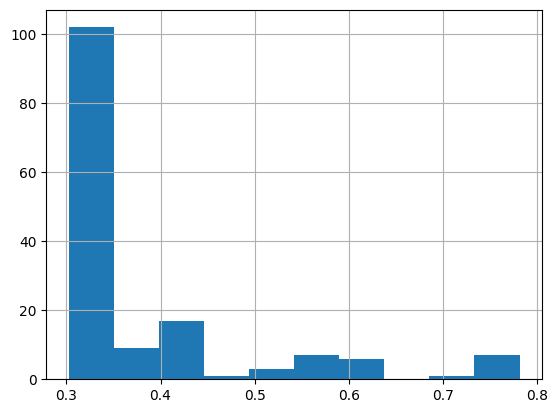

In [22]:
matches['similarity'].hist()

In [23]:
top_matches = matches.nlargest(10, 'similarity')
print(top_matches[['JobId', 'CRN', 'similarity']])


        JobId    CRN  similarity
0  3693072016  70945    0.781047
0  3693072016  72364    0.781047
0  3693072016  72366    0.781047
0  3693072016  72367    0.781047
0  3693072016  31226    0.751551
0  3693072016  66500    0.751551
0  3693072016  68614    0.751551
0  3693072016  39075    0.730070
0  3693072016  70131    0.591714
0  3693072016  70722    0.591714


In [24]:
recommended_courses = set()
job_id = '3693072016'

print(f'Recommended courses for position {jobs[jobs["JobId"] == job_id]["Title"]}:')

for crn in matches[matches['JobId'] == job_id]['CRN']:
    recommended_courses.add(courses[courses['CRN'] == crn]['Name'].values[0])
recommended_courses

Recommended courses for position 4007    Oracle Database Administrator
Name: Title, dtype: object:


{'Accelerated Fundamentals of Computing II',
 'Advanced GIS for Environmental Management',
 'Big Data Infrastructures',
 'Computation and Music III',
 'Data Literacy',
 'Data Management, Curation &amp; Reproducibility',
 'Data Mining',
 'Data Warehousing and Business Intelligence',
 'Database Design and Management',
 'Database Design and Prototyping',
 'Database Systems',
 'Developmental Child Psych Lab',
 'Education Abroad',
 'Enterprise Database Management',
 'Enzyme Reaction Mechanisms',
 'Financial Data Management and Analysis',
 'Foundations of CyberGIS &amp; Geospatial Data Science',
 'Information Modeling',
 'Intro Computing: Non-Tech',
 'Introduction to Data Mining',
 'Introduction to Database Concepts &amp; Applications',
 'Introduction to Programming Python for Data Science',
 'Linear Algebra with Computational Applications',
 'Medicine - Data Science Project (Longitudinal)',
 'Res &amp; Bibliography in Music',
 'Research Methods II',
 'Statistical Data Management',
 'Structu

In [34]:
matches.join(courses.set_index("CRN"), on="CRN")[
    ["JobId", "CRN", "Name", "similarity", "Subject", "Number"]
].join(jobs.set_index("JobId"), on="JobId")[
    ["Title", "Name", "similarity", "Subject", "Number"]
].drop_duplicates().nlargest(
    60, "similarity"
).head(
    60
).sort_values(
    by="similarity", ascending=False
)


,Title,Name,similarity,Subject,Number
0,Oracle Database Administrator,Introduction to Database Concepts &amp; Applic...,0.781047,IS,206
0,Oracle Database Administrator,Database Design and Management,0.751551,BADM,352
0,Oracle Database Administrator,Enterprise Database Management,0.730070,BADM,554
0,Oracle Database Administrator,Database Design and Prototyping,0.591714,IS,455
0,Oracle Database Administrator,Vet Info Tech/Computer App,0.551231,PATH,575
0,Oracle Database Administrator,Database Systems,0.544343,CS,411
0,Oracle Database Administrator,Statistical Data Management,0.532149,STAT,440
0,Oracle Database Administrator,Big Data Infrastructures,0.507427,BADM,558
0,Oracle Database Administrator,Data Mining,0.462648,IS,577
0,Oracle Database Administrator,Enzyme Reaction Mechanisms,0.444187,CHEM,572
